In [1]:
%matplotlib widget
import numpy as np
from astropy import units as u, constants as c
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import matplotlib
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.io import fits
import scipy.interpolate as interp

[-955.02891409 -905.67341466 -856.31791522 -806.96241578 -757.60691635
 -708.25141691 -658.89591747 -609.54041804 -560.1849186  -510.82941916
 -461.47391973 -412.11842029 -362.76292085 -313.40742142 -264.05192198
 -214.69642255 -165.34092311 -115.98542367  -66.62992424  -17.2744248
   32.08107464   81.43657407  130.79207351  180.14757295  229.50307238
  278.85857182  328.21407126  377.56957069  426.92507013  476.28056957
  525.636069    574.99156844  624.34706788  673.70256731  723.05806675
  772.41356619  821.76906562  871.12456506  920.4800645   969.83556393]


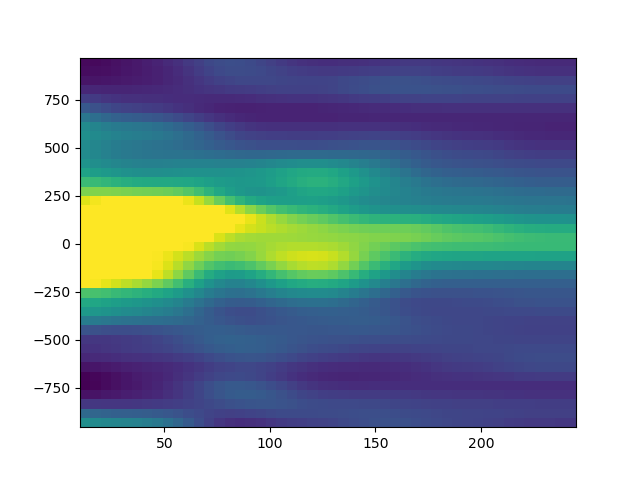

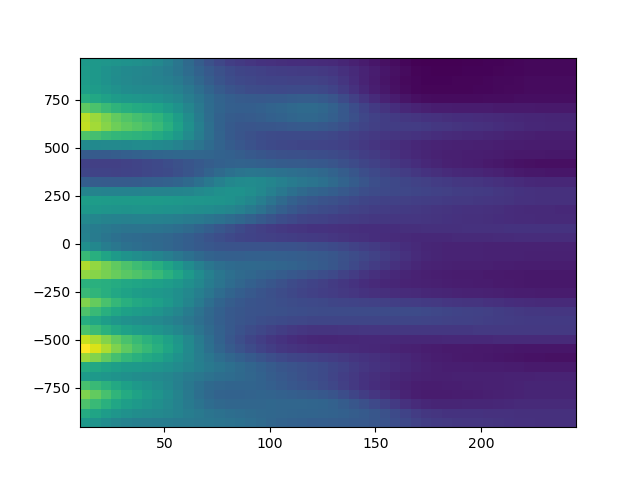

In [7]:
bvec = np.arange(10, 250, 5)
line, lwave = 'Lya', 1215.67
stack_wave = np.arange(1150, 1750, 0.2)

vscale = 3e5 * (stack_wave - lwave) / lwave
vcut = (vscale > -1000) & (vscale < 1000)

vs = vscale[vcut]
print(vs)
lya_map = fits.open('lya_map_240701.fits')[0].data
err_map = fits.open('lya_error_map_240701.fits')[0].data

lya_conv = convolve(lya_map, Gaussian2DKernel(2,1), boundary = 'extend') # (b,v) = 1 kpc, 50 km/s -> 5 kpc, 100 km/s
err_conv = convolve(err_map, Gaussian2DKernel(2,1), boundary = 'extend') # (b,v) = 1 kpc, 50 km/s -> 5 kpc, 100 km/s

plt.figure()
plt.imshow(lya_conv, aspect='auto', origin='lower', extent = [bvec.min(), bvec.max(), vs.min(), vs.max()], vmax=0.7)
plt.show()
plt.figure()
plt.imshow(err_conv, aspect='auto', origin='lower', extent = [bvec.min(), bvec.max(), vs.min(), vs.max()])
plt.show()

(41, 49)


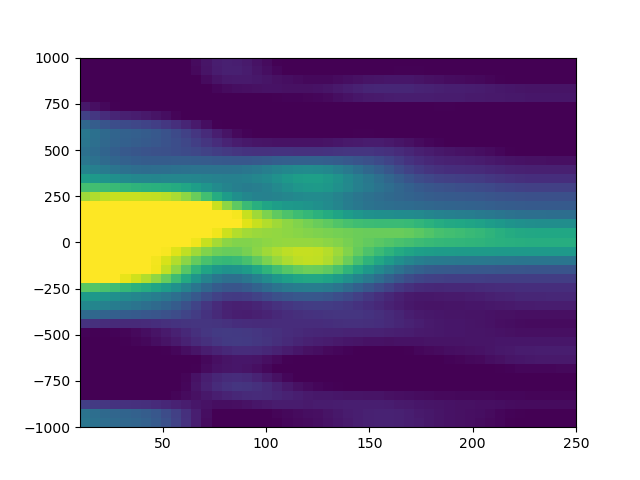

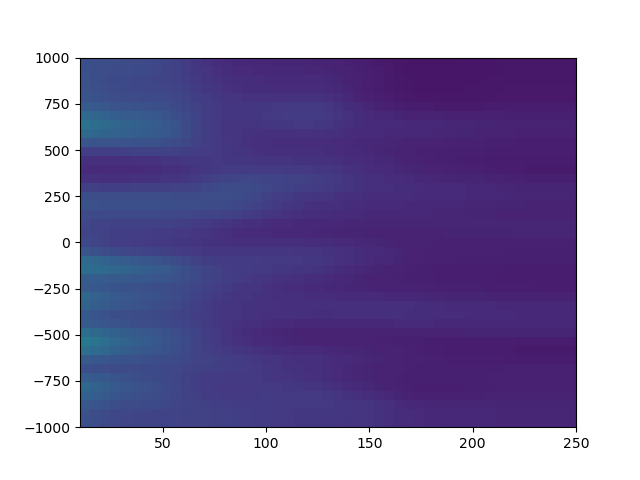

In [12]:
lya = interp.RectBivariateSpline(vs, bvec, lya_conv, kx=3, ky=3)
newb = np.arange(10,252.5,5)
newv = np.arange(-1000, 1025, 50)
new_lya = lya(newv, newb)

lyaerr = interp.RectBivariateSpline(vs, bvec, err_conv, kx=3, ky=3)
new_err = lyaerr(newv, newb)

print(new_lya.shape)

plt.figure()
plt.imshow(new_lya, aspect='auto', origin='lower', extent = [newb.min(), newb.max(), newv.min(), newv.max()], vmin=0, vmax = 0.7)
plt.show()

plt.figure()
plt.imshow(new_err, aspect='auto', origin='lower', extent = [newb.min(), newb.max(), newv.min(), newv.max()], vmin=0, vmax = 0.7)
plt.show()


fits.PrimaryHDU(new_lya).writeto('lya_conv_240701.fits', overwrite=True)
fits.PrimaryHDU(new_err).writeto('lya_error_conv_240701.fits', overwrite=True)
